<a href="https://colab.research.google.com/github/samuelacquatey/ChatAssess/blob/main/Covid19_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset#

Datasheets:
*   `main` -> DECEMBER ACCRA
*   `sheet1` -> Sheet1
*   `sheet2` -> Sheet2



[link to data](https://docs.google.com/spreadsheets/d/19aV4LR_QMbXlUUf4opwpW9m5L2SbOcpeW6MANvuBKP4/edit?usp=sharing)

In [ ]:
main=pd.read_excel("Data Corrected.xlsx", sheet_name="DECEMBER ACCRA")
sheet1=pd.read_excel("Data Corrected.xlsx", sheet_name="Sheet1")
sheet2=pd.read_excel("Data Corrected.xlsx", sheet_name="Sheet2")

In [ ]:
main.head()

,Region,District/Muncipality/Metropolitan,Wantai Elisa Results,qPCR Results,Have you received the COVID-19 vaccination,Enumeration area/ Locality,Rural/Urban,Enter respondent's sex,How old are you?,What is the highest education attained/completed by ?,...,Pre-existing medical conditions,Vaccinated,Total number of symptoms,Adherence to COVID-19 protocols,Adherence to COVID-19 protocols.1,Educational level,Employment status,Sex of respondent,Symptoms,With symptoms
0,Greater Accra,Ga South (Weija),Positive,Negative,Yes,Sampa Valley,Urban,Male,48,Secondary School,...,No,Yes,0,1,Low,Secondary+,Unemployed,Male,No symptoms,No symptoms
1,Greater Accra,Ga South (Weija),Negative,Positive,No,Sampa Valley,Urban,Female,33,Secondary School,...,No,No,0,1,Low,Secondary+,Employed,Female,No symptoms,No symptoms
2,Greater Accra,Ga South (Weija),Positive,Negative,Yes,Sampa Valley,Urban,Female,19,Secondary School,...,No,Yes,0,1,Low,Secondary+,Unemployed,Female,No symptoms,No symptoms
3,Greater Accra,Ga South (Weija),Positive,Positive,No,Sampa Valley,Urban,Female,13,Primary,...,No,No,0,1,Low,Primary,Unemployed,Female,No symptoms,No symptoms
4,Greater Accra,Ga South (Weija),Positive,Negative,Yes,Sampa Valley,Urban,Male,27,College/University/Polytechnic,...,No,Yes,0,2,Low,Secondary+,Employed,Male,No symptoms,No symptoms


In [ ]:
main.describe()

,How old are you?,Current temperature of,Some people are able to make changes to their lifestyle in response to the coron,Total number of symptoms,Adherence to COVID-19 protocols
count,1027.000000,1027.000000,0.0,1027.000000,1027.000000
mean,30.400195,36.718647,NaN,0.319377,2.740019
std,18.984977,0.814047,NaN,0.862498,3.202336
min,5.000000,34.600000,NaN,0.000000,0.000000
25%,14.000000,36.250000,NaN,0.000000,0.000000
50%,28.000000,36.400000,NaN,0.000000,1.000000
75%,42.000000,36.800000,NaN,0.000000,5.000000
max,95.000000,40.000000,NaN,6.000000,9.000000


In [ ]:
main = main.replace({'yes': 1, 'no': 0}, regex=True)

In [ ]:
categorical_cols=main.select_dtypes(include=['object', 'category'])

for col in categorical_cols:
  print(f"\n Column: {col}")
  print(main[col].value_counts(normalize=True))


 Column: Region
Region
Greater Accra    1.0
Name: proportion, dtype: float64

 Column: District/Muncipality/Metropolitan
District/Muncipality/Metropolitan
Ga South (Weija)                              0.136319
Ledzokuku Krowor Municipal (Teshie-Nungua)    0.116845
Ashaiman (Ashaiman)                           0.076923
Ablekuma North                                0.059396
Ga West (Amasaman)                            0.059396
Ablekuma Central                              0.058423
La Dadekotopon Municipal (La)                 0.058423
Ayawaso Central                               0.042843
Ablekuma South                                0.039922
Ga East (Abokobi)                             0.038948
Ashiedu Keteke                                0.038948
Ayawaso East                                  0.038948
Tema East                                     0.038948
Okai Koi South                                0.038948
Ada East (Ada-Foah)                           0.020448
Osu Klotey         

*Searching empty values by columns*

In [ ]:
print(main.isnull().values.any())
#if there are any empty columns, it will return True, and nothing if there are not empty columns

False


*Dropping Columns with too many empty values: flagged unnecessary*

In [ ]:
'''for col in main.columns:
  findna=main[col].isna().sum()
  if findna > 1/3 * len(main):
    main.drop(col, axis=1, inplace=True)'''

*Dropping Rows with Empty Values*

In [ ]:
main=main.dropna()

In [ ]:
main.shape

(990, 78)

*Encoding Categorical Data*

In [ ]:
cat_cols=main.select_dtypes(include=['object', 'category'])

for col in cat_cols:
  main[col]=main[col].astype('category').cat.codes


*when we look through the data, we can see that there are some columns that duplicates of each other*

In [ ]:
true_values = [item for item in main.T.duplicated().tolist() if item is True]
print(true_values)

[]


In [ ]:
main = main.loc[:, ~main.T.duplicated()]

##Finding The Most Correlated Features of the Dataset##

*calculate the correlation matrix*

In [ ]:
correlation_matrix = main.corr()

*identify highly correlated pairs*

In [ ]:
#Remove the diagonal part (correlation with itself)
correlation_matrix = correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))

#Flatten the matrix to get the top N correlations
stacked_corr = correlation_matrix.stack().sort_values(ascending=False)

num_top_pairs = 10

#get the indices of the top N correlations
top_corr_pair = stacked_corr.head(num_top_pairs).index.tolist()

#Extract the names of the most correlated features
most_corr_features = list(set([name for pair in top_corr_pair for name in pair]))


print(most_corr_features)

['Chills.1', 'Loss of appetite.1', 'Abdomina pain', 'Loss of smell(Anosmia)', 'Sex of respondent', 'Vaccinated', "Enter respondent's sex", 'Loss of appetite', 'Have you received the COVID-19 vaccination', 'Chills', 'Fatigue', 'Loss of smell*(Anosmia)', 'Diarrhea.1', 'Abdomina pain.1', 'Headache.1', 'Fatigue.1', 'Elisa results', 'Diarrhea', 'Wantai Elisa Results', 'Headache']


*filtering the dataframe to only include the most correlated features*

In [ ]:
filtered_main=main[most_corr_features]

*recalculate the correlation matrix for the filtered data*

In [ ]:
filtered_correlation_matrix = filtered_main.corr()

*visualize the Correlations*

Text(0.5, 1.0, 'Correlation Matrix')

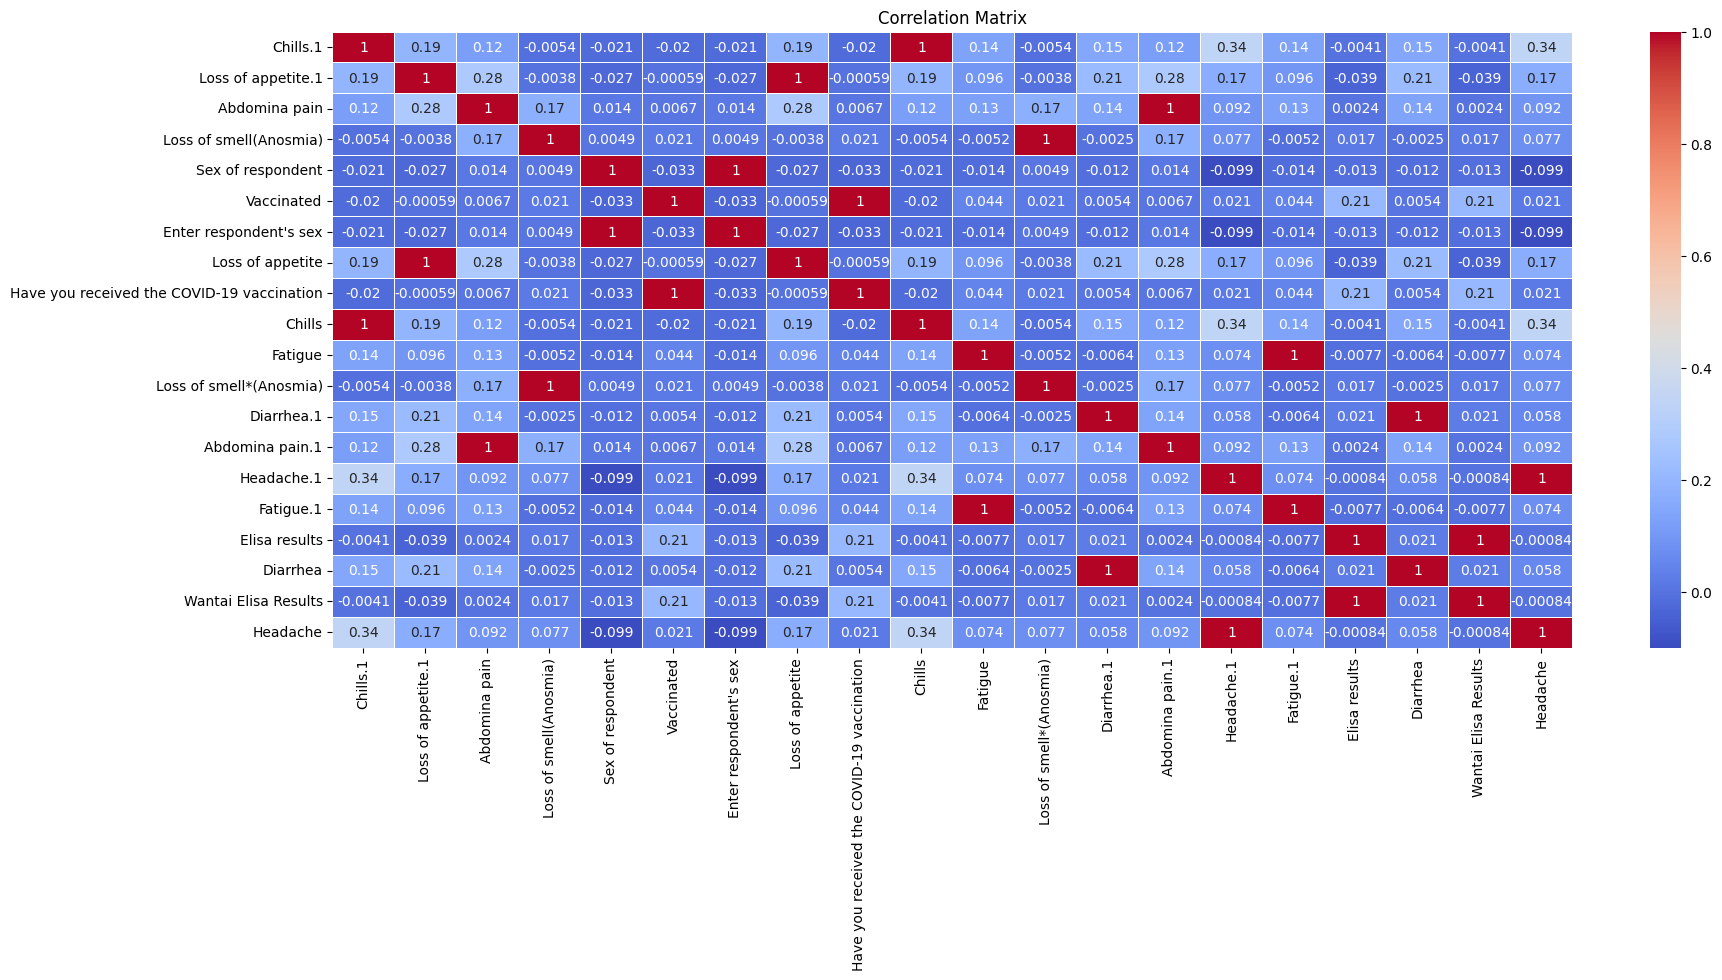

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')